# Table of Contents

### 1. [Introduction](#Markov_Chain)
### 2. [Dataset](#dataset)
#### 2.1 [Wordcloud](#word-cloud)
### 3. [Markov Model](#markov-model)
### 4. [Generate Text](#generate-text)

<hr>

## <a id='Markov_Chain'>1. Introduction</a>

> Markov Chain is a stochastic model in which the probability of an event occuring depends only upon preceding event. The history of events do not matter when deciding the probabilities of next event. This is called Markov Property and the sequence of events that follow this property are called Markov Chain.

> The probability of jumping from an event to next one are modeled through transitional probabilities. Below is the formula to calculate transitional probabililty given event $x_n$ has happened.

> $Transitional Probability = P(X_{n+1} = x_{n+1} | X_n = x_n)$

> In this notebook, we will generate text using Markov Chain model. The dataset will be used from Kaggle.

## <a id='dataset'>2. Dataset</a>

> The dataset (corpus) for this project is taken from the public dataset avaialble on Kaggle. Here is the link to the dataset https://www.kaggle.com/idevji1/sherlock-holmes-stories
Below is the preview of the text.

In [1]:
demo_text_list = open("./archive/sherlock/cree.txt").readlines()
demo_text = ''.join(demo_text_list)
print(demo_text[:1000])





                        THE ADVENTURE OF THE CREEPING MAN

                               Arthur Conan Doyle



     Mr. Sherlock Holmes was always of opinion that I should publish the
     singular facts connected with Professor Presbury, if only to dispel
     once for all the ugly rumours which some twenty years ago agitated
     the university and were echoed in the learned societies of London.
     There were, however, certain obstacles in the way, and the true
     history of this curious case remained entombed in the tin box which
     contains so many records of my friend's adventures. Now we have at
     last obtained permission to ventilate the facts which formed one of
     the very last cases handled by Holmes before his retirement from
     practice. Even now a certain reticence and discretion have to be
     observed in laying the matter before the public.

     It was one Sunday evening early in September of the year 1903 that I
     received one of Holmes's laconic 

### <a id='word-cloud'>2.1 Wordcloud</a>

> We will plot wordclouds of some sample files. This will give us a little idea of most common words used.

In [2]:
# import libraries
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
from collections import Counter
import random

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sandi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


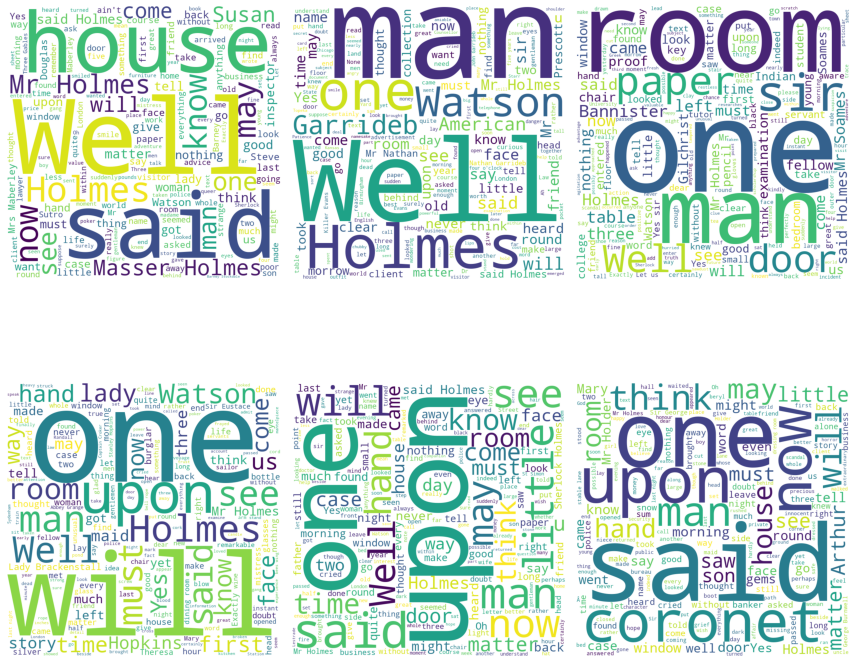

In [3]:
# plot wordcloud in subplots
txt_files = os.listdir("./archive/sherlock")

def plot_wordcloud(text_file, path = './archive/sherlock/'):
    text_list = open(os.path.join(path, text_file)).readlines()
    corpus = "".join(text_list)
    # plot wordcloud
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(corpus)
    return wordcloud

# plot the WordCloud image  
fig = plt.figure(figsize=(12, 12), facecolor = None)
plt.subplot(2, 3, 1)
wordcloud = plot_wordcloud(txt_files[0])
plt.imshow(wordcloud)
plt.axis("off")

plt.subplot(2, 3, 2)
wordcloud = plot_wordcloud(txt_files[1])
plt.imshow(wordcloud)
plt.axis("off")

plt.subplot(2, 3, 3)
wordcloud = plot_wordcloud(txt_files[2])
plt.imshow(wordcloud)
plt.axis("off")

plt.subplot(2, 3, 4)
wordcloud = plot_wordcloud(txt_files[3])
plt.imshow(wordcloud)
plt.axis("off")

plt.subplot(2, 3, 5)
wordcloud = plot_wordcloud(txt_files[4])
plt.imshow(wordcloud)
plt.axis("off")

plt.subplot(2, 3, 6)
wordcloud = plot_wordcloud(txt_files[5])
plt.imshow(wordcloud)
plt.axis("off")

plt.tight_layout()
plt.show()

## <a id='markov-model'>3. Markov Model</a>

> We will build a Markov Model with below expression for transition probabilities

> $Transitional Probability = P(X_{n+1} = x_{n+1} | X_n = x_n)$

In [4]:
# Combine all text files

def combine_txt_files(text_files, path = './archive/sherlock/'):
    corpus = []
    for file in text_files:
        with open(os.path.join(path, file)) as f:
            for line in f:
                line = line.strip()
                if line != '':
                    corpus.append(line)
    return corpus
        
txt_files = os.listdir("./archive/sherlock")
all_text = combine_txt_files(txt_files)
print('Number of Lines in the input text:', len(all_text))

Number of Lines in the input text: 215663


In [5]:
# Tokenizing text

def tokenize_text(text):
    tokenized_text = []
    for line in text:
        line = line.lower()
        tokens = word_tokenize(line)
        tokenized_text.extend([w for w in tokens if w.isalpha()])
    return tokenized_text

tokenized_text = tokenize_text(all_text)
print("number of words in the input text:", len(tokenized_text))

number of words in the input text: 2323808


In [6]:
# Markov Model

def build_morkov_model(text, n_gram=2):
    markov_model = {}
    
    # create dictionary having no. of transitions from current state to next state
    for i in range(len(text)-n_gram-1):
        state_zero, state_one = "",""
        for j in range(n_gram):
            state_zero += text[i+j] + " "
            state_one += text[i+j+n_gram] + " "
        if not state_zero in markov_model:
            markov_model[state_zero] = {}
            markov_model[state_zero][state_one] = 1
        else:
            if state_one in markov_model[state_zero]:
                markov_model[state_zero][state_one] += 1
            else:
                markov_model[state_zero][state_one] = 1
    
    # calculate transition probabilities based on transition frequencies
    for state_zero, transition in markov_model.items():
        total_transitions = sum(transition.values())
        for state, transition_count in transition.items():
            markov_model[state_zero][state] = transition_count/total_transitions
    
    return markov_model

markov_model = build_morkov_model(tokenized_text)

In [ ]:
import json

json_object = json.dumps(markov_model, indent = 4)

with open('markov_model_JSON.txt', 'w') as outputFile:
    json.dump(json_object, outputFile)

- preview transition probabilites

In [7]:
markov_model['the adventure ']

{'of the ': 0.8599348534201955,
 'of black ': 0.02280130293159609,
 'of charles ': 0.02280130293159609,
 'of wisteria ': 0.02280130293159609,
 'of shoscombe ': 0.016286644951140065,
 'was a ': 0.013029315960912053,
 'far from ': 0.013029315960912053,
 'of last ': 0.009771986970684038,
 'as a ': 0.009771986970684038,
 'i will ': 0.009771986970684038}

## <a id='generate-text'>4. Generate Text</a>

> We will generate the text by restricting the next state to top five probable states. This will generate text that will make more sense rather than generating a random text which does not have any meaning.

In [8]:
def generate_text(markov_model, limit = 50, start = 'the adventure '):
    state_zero = start
    state_one = None
    text = ''
    text = state_zero + ' '
    for i in range(limit):
        state_one_dictionary = Counter(markov_model[state_zero])
        try:
            state_one = state_one_dictionary.most_common(10)[random.randint(0, 5)][0]
        except:
            state_one = state_one_dictionary.most_common(10)[0][0]
        text += state_one + ' '
        state_zero = state_one
    return text

- generate text beginning with word 'the adventure '

In [9]:
for i in range(10):
    print(f's_{i}', ': ', generate_text(markov_model, limit=10))

s_0 :  the adventure  of shoscombe  park and  so through  oxford street  and i  am sure  that they  had been  on the  very day  
s_1 :  the adventure  of wisteria  lodge was  a ruin  of black  lace which  fringed the  hand that  what i  was doing  me on  
s_2 :  the adventure  of charles  the first  place i  was ten  before we  found ourselves  at the  sight of  them the  photograph and  
s_3 :  the adventure  of shoscombe  old place  between eight  and nine  which had  been left  very poor  but he  has a  soul of  
s_4 :  the adventure  of shoscombe  park and  that the  crime was  committed exactly  holmes i  assure you  that it  was a  long silence  
s_5 :  the adventure  of black  fluffy ashes  as of  the swimmer  who leaves  the bank  directors with  the result  of your  difficulties i  
s_6 :  the adventure  of wisteria  lodge are  confederates in  some design  the attempt  was a  good deal  holmes i  do not  propose to  
s_7 :  the adventure  of shoscombe  prince i  see in  the t

- starting with 'sherlock holmes '

In [10]:
for i in range(10):
    print(f's_{i}', ': ', generate_text(markov_model, start = 'sherlock holmes ', limit=10))

s_0 :  sherlock holmes  i have  told you  that i  should have  no difficulty  in getting  him not  that ever  was seen  swinging in  
s_1 :  sherlock holmes  as we  emerged from  the a  coachman and  two maids  form the  other end  if mycroft  has given  her notice  
s_2 :  sherlock holmes  and i  shall be  very happy  to accommodate  myself to  see what  would come  cheap at  in fact  yes it  
s_3 :  sherlock holmes  it is  just possible  that it  would be  likely to  be in  time for  me to  think of  no other  
s_4 :  sherlock holmes  as we  approached the  door flew  open and  empty beside  it as  much as  the bracket  and no  word has  
s_5 :  sherlock holmes  and i  could see  that the  man who  had wronged  her wronged  her perhaps  far more  than we  suspected in  
s_6 :  sherlock holmes  had been  cut off  my hair  in both  his hands  to his  feet and  ran with  her along  the corridor  
s_7 :  sherlock holmes  as we  passed the  station barriers  where a  few lights  still gli

- starting with 'my son '

In [11]:
for i in range(10):
    print(f's_{i}', ': ', generate_text(markov_model, start = 'my son ', limit=10))

s_0 :  my son  and know  how to  walk amid  the dangers  which encompass  me i  have been  on the  very day  that i  
s_1 :  my son  you give  me one  for christmas  and i  have no  objection to  my collaborating  with you  in the  centre of  
s_2 :  my son  and know  how to  look but  how will  you look  cold ryder  pray take  the i  could hardly  believe that  
s_3 :  my son  in one  of those  lines of  dingy brick  lay before  me but  he would  have made  myself clear  i am  
s_4 :  my son  and you  can imagine  watson how  pleased i  was at  my wit  end for  goodness sake  let us  have the  
s_5 :  my son  himself indicated  that of  the other  side of  the street  was absolutely  nothing in  it after  him and  it was  
s_6 :  my son  in one  of these  that the  crime was  committed at  two in  the morning  he was  a man  with a  
s_7 :  my son  himself indicated  that of  your friend  is a  man of  the world  did you  ever hear  of a  man in  
s_8 :  my son  alec had  torn it  out

- starting with 'i will '

In [12]:
for i in range(10):
    print(f's_{i}', ': ', generate_text(markov_model, start = 'i will ', limit=10))

s_0 :  i will  show you  the steps  worn hollow  in the  hands of  the police  are making  a little  cry of  surprise and  
s_1 :  i will  do so  well well  it just  like any  other tourist  upon the  table it  was ten  and now  i have  
s_2 :  i will  ask you  now is  to work  form the  window what  link could  there be  any objection  et cetera  in reply  
s_3 :  i will  take the  horse out  on to  the lawn  i held  the little  that i  could not  fail to  see what  
s_4 :  i will  show you  the steps  of your  cases watson  mental not  physical all  right come  if you  will be  away all  
s_5 :  i will  do so  and i  could see  by his  eager face  of inspector  lestrade and  also the  pencil cuttings  when we  
s_6 :  i will  do so  well well  it is  just possible  that it  was a  man of  the world  have you  heard the  
s_7 :  i will  do so  well well  said holmes  rising and  pulling on  his overcoat  in order  to give  you any  pleasure he  
s_8 :  i will  give you  a general  ide

- starting with 'i will '

In [13]:
for i in range(10):
    print(f's_{i}', ': ', generate_text(markov_model, start = 'dear holmes ', limit=10))

s_0 :  dear holmes  i am  not a  moment to  lose he  rushed into  the followed  by the  fact that  screw was  not used  
s_1 :  dear holmes  he has  the reputation  down there  for trees  are always  a neighborly  kind of  rattled and  from the  top of  
s_2 :  dear holmes  i have  said that  he would  have made  up my  mind you  this that  if i  had been  removed but  
s_3 :  dear holmes  i should  wish to  speak to  me so  well that  is not  for me  to do  something for  friend hopkins  
s_4 :  dear holmes  oh yes  it is  a very  busy day  and i  am sure  that it  would be  impossible to  find out  
s_5 :  dear holmes  i have  heard of  you holmes  that is  what we  are in  quest of  a solution  but what  i want  
s_6 :  dear holmes  i should  like to  meet him  here and  there is  only one  but a  black was  hung upon  the couch  
s_7 :  dear holmes  i should  not be  long before  and that  he had  not gone  to bed  oh no  my friend  and colleague  
s_8 :  dear holmes  said i  it is

- starting with 'have you'

In [14]:
for i in range(10):
    print(f's_{i}', ': ', generate_text(markov_model, start = 'have you ', limit=10))

s_0 :  have you  heard of  it he  was a  young man  staggered back  with a  cry of  a hound  the latter  was a  
s_1 :  have you  to say  that there  was something  depressing and  subduing in  the sudden  glare flashing  into my  head that  i felt  
s_2 :  have you  been doing  for some  time in  silent thought  from which  the other  hand i  had sprung  for the  purpose of  
s_3 :  have you  heard the  rattle of  the wheels  of his  chair with  an exclamation  from my  lips at  the sight  of me  
s_4 :  have you  been doing  here at  that hour  and i  shall be  happy to  advance it  without further  parley from  my own  
s_5 :  have you  to say  that my  poor father  met his  death was  little short  of is  certainly not  no one  else in  
s_6 :  have you  heard the  sound of  horses hoofs  and grating  wheels against  the curb  and forcing  a way  that showed  that they  
s_7 :  have you  heard the  slam of  the hall  and a  cry of  fire it  will be  good enough  to chronicle  and i

- starting with 'the police '

In [15]:
for i in range(10):
    print(f's_{i}', ': ', generate_text(markov_model, start = 'the police ', limit=10))

s_0 :  the police  are making  so free  i may  be of  more use  at lamberley  than here  it is  probable that  beddoes pushed  
s_1 :  the police  are already  upstairs it  was my  own voice  reverberating in  a rolling  cloud of  terror which  was dreadful  to listen  
s_2 :  the police  are already  upstairs it  was my  custom to  do this  we must  have a  right to  make me  certain that  
s_3 :  the police  it was  he who  discovered some  time ago  he purchased  from morse  hudson two  duplicate plaster  casts of  the famous  
s_4 :  the police  are already  after them  i could  not see  that there  is a  man with  rounded shoulders  a massive  oak mantelpiece  
s_5 :  the police  are already  after them  it was  he who  will come  back to  me and  i was  able to  do something  
s_6 :  the police  and yet  you have  all the  rest of  your breakfast  watson and  i will  ask you  a few  hundred yards  
s_7 :  the police  so that  he might  have a  good deal  holmes i  assure you  tha

In [16]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show/ Hide Code"></form>''')

<footer id="footer" style="float:left; color:#999; background:#fff;">
    Markov Chains Model
</footer>